# **1. Import Library**

Pada tahap ini, kita akan mengimpor berbagai library atau modul yang diperlukan dalam proses pembangunan model klasifikasi. Library-library ini mencakup NumPy dan pandas untuk manipulasi data, sklearn untuk pembangunan model, dan matplotlib/seaborn untuk visualisasi data. Dengan mengimpor library-library ini, kita dapat menggunakan fungsi-fungsi yang diperlukan untuk pra-pemrosesan data, pembangunan model, dan evaluasi model klasifikasi.

In [ ]:
# Impor pustaka yang diperlukan untuk operasi numerik
import numpy as np  # Import numpy untuk operasi numerik seperti manipulasi array

# Impor pustaka yang diperlukan untuk pemrosesan data dan pembangunan model
# Import pandas untuk manipulasi dan analisis data
import pandas as pd

# Import train_test_split dari scikit-learn untuk memisahkan data
from sklearn.model_selection import train_test_split

# Import StandardScaler dari scikit-learn untuk standarisasi data
from sklearn.preprocessing import StandardScaler

# Import LogisticRegression dari scikit-learn untuk model regresi logistik
from sklearn.linear_model import LogisticRegression

# Import RandomForestClassifier dari scikit-learn untuk model Random Forest
from sklearn.ensemble import RandomForestClassifier

# Import SVC dari scikit-learn untuk model Support Vector Machine (SVM)
from sklearn.svm import SVC

# Import DecisionTreeClassifier dari scikit-learn untuk model Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Import MultinomialNB dari scikit-learn untuk model Naive Bayes
from sklearn.naive_bayes import MultinomialNB

# Import metrik evaluasi dari scikit-learn untuk mengukur performa model
from sklearn.metrics import accuracy_score, classification_report

# Import GridSearchCV dari scikit-learn untuk pencarian hiperparameter
from sklearn.model_selection import GridSearchCV

# Import metrik evaluasi lainnya
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Impor pustaka untuk visualisasi data
# Import matplotlib.pyplot untuk membuat plot
import matplotlib.pyplot as plt

# Import seaborn untuk plot visualisasi data yang lebih menarik
import seaborn as sns

# **2. Menampilkan Dataset**

Pada tahap ini, kita akan menampilkan dataset yang akan digunakan untuk pembangunan model klasifikasi. Dataset ini dapat berupa data yang sudah ada atau yang telah dikumpulkan sebelumnya, dan kita perlu memahami struktur dan karakteristiknya sebelum memprosesnya lebih lanjut.

Download dataset di [sini](https://github.com/dicodingacademy/dicoding_dataset/blob/main/students_performance/data.csv).

In [ ]:
# URL raw dari file CSV di GitHub
url = "https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/students_performance/data.csv"

# Membaca data dari URL raw dengan pemisah titik koma
data = pd.read_csv(url, delimiter=';')

In [ ]:
# Menampilkan lima baris pertama dari dataset pelatihan (df_train)
data.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [ ]:
# Menampilkan informasi mengenai dataset pelatihan (df_train)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

Pastikan tidak ada missing dan duplicate value dalam dataset sebelum kita ke tahap berikutnya.



In [ ]:
# Periksa jumlah nilai yang hilang dalam dataset
missing_values = data.isnull().sum()
print("Jumlah nilai yang hilang dalam dataset :")
print(missing_values)

Jumlah nilai yang hilang dalam dataset :
Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_en

In [ ]:
# Memeriksa dan menghitung jumlah nilai duplikat dalam dataset
duplicate_count = data.duplicated().sum()
print("Jumlah nilai duplikat dalam dataset:", duplicate_count)

Jumlah nilai duplikat dalam dataset: 0


#**2. Exploratory Data Analysis**

Dalam tahap ini, kita akan melakukan Exploratory Data Analysis (EDA) pada dataset. EDA adalah proses untuk memahami lebih dalam tentang dataset yang kita miliki.

##**Distribusi Kelas Target**

Pada bagian ini, kita akan melihat sebaran jumlah sampel data di setiap kategori kelas yang akan diprediksi. Hal ini penting untuk mengidentifikasi apakah terdapat ketidakseimbangan kelas, di mana satu kelas mungkin memiliki jumlah sampel yang jauh lebih banyak atau lebih sedikit daripada kelas lainnya.

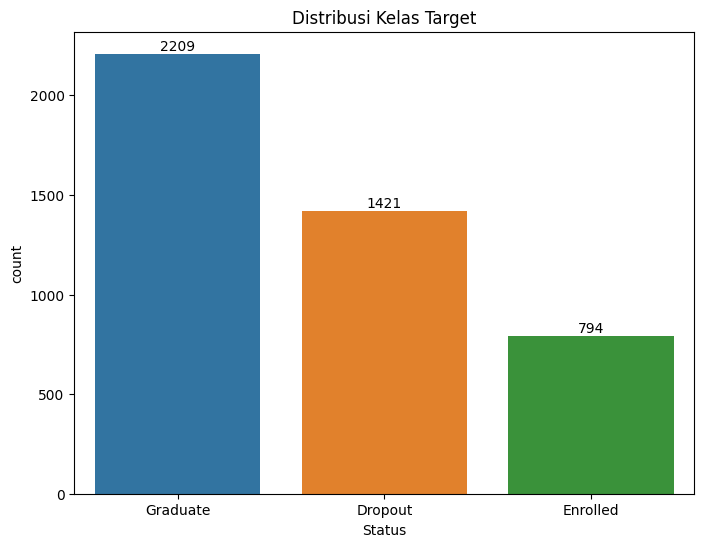

In [ ]:
# Menghitung jumlah masing-masing kelas
class_counts = data['Status'].value_counts()

# Menyusun ulang urutan kelas
class_order = class_counts.index

# Plot distribusi kelas target
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Status', data=data, order=class_order)
plt.title("Distribusi Kelas Target")

# Menambahkan label jumlah pada batang plot
for i, count in enumerate(class_counts):
    ax.text(i, count, str(count), ha='center', va='bottom', fontsize=10, color='black')

plt.show()

##**Label Encoding**

Pada tahap ini, kita akan mengubah nilai-nilai dalam kolom yang awalnya berupa teks menjadi angka-angka. Hal ini diperlukan karena kebanyakan model machine learning memerlukan input berupa angka, bukan teks.

Contohnya, kita akan mengonversi label kelas 'Status' menjadi bentuk angka, di mana 'Graduate' akan diwakili oleh 0, 'Enrolled' akan diwakili oleh 1, dan 'Dropout' akan diwakili oleh 2. Langkah ini memungkinkan kita untuk melatih model klasifikasi dengan lebih efektif.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Membuat objek LabelEncoder
label_encoder = LabelEncoder()

# Menggunakan LabelEncoder untuk mengubah kolom "Status" menjadi numerik
data['Status'] = label_encoder.fit_transform(data['Status'])

In [ ]:
data.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2


##**Menampilkan korelasi antara kolom "Status" dengan kolom lainnya**

Pada tahap ini, kita akan melihat seberapa kuat hubungan antara kolom "Status" (kelas target) dengan kolom-kolom lainnya dalam dataset. Korelasi ini dapat memberikan wawasan tentang kolom mana yang mungkin memiliki pengaruh signifikan terhadap prediksi status mahasiswa. Sebagai contoh, jika ada kolom dengan korelasi positif yang kuat dengan status, itu bisa menjadi indikasi bahwa kolom tersebut memiliki pengaruh besar terhadap keputusan status mahasiswa.



In [ ]:
# Korelasi antara kolom "Status" dengan kolom lainnya
correlations = data.corr(method='pearson')['Status'].sort_values(ascending=False)

# Menampilkan urutan korelasi tertinggi
print("Urutan Korelasi Tertinggi dengan Kolom 'Status':")
print(correlations)

Urutan Korelasi Tertinggi dengan Kolom 'Status':
Status                                          1.000000
Curricular_units_2nd_sem_approved               0.624157
Curricular_units_2nd_sem_grade                  0.566827
Curricular_units_1st_sem_approved               0.529123
Curricular_units_1st_sem_grade                  0.485207
Tuition_fees_up_to_date                         0.409827
Scholarship_holder                              0.297595
Curricular_units_2nd_sem_enrolled               0.175847
Curricular_units_1st_sem_enrolled               0.155974
Admission_grade                                 0.120889
Displaced                                       0.113986
Previous_qualification_grade                    0.103764
Curricular_units_2nd_sem_evaluations            0.092721
Application_order                               0.089791
Daytime_evening_attendance                      0.075107
Curricular_units_2nd_sem_credited               0.054004
Curricular_units_1st_sem_credited      

##**Seleksi Fitur**

Seleksi fitur adalah proses untuk memilih subset dari fitur-fitur yang tersedia dalam dataset yang paling relevan atau berpengaruh dalam pembuatan model. Hal ini bertujuan untuk mengurangi dimensi dataset, menghilangkan fitur-fitur yang tidak memberikan kontribusi signifikan, dan menghindari overfitting.

Pada tahap ini, kita melakukan seleksi fitur untuk memilih fitur-fitur yang paling berpengaruh dalam memprediksi status mahasiswa. Ini dapat membantu kita membangun model yang lebih sederhana dan efisien. Dalam kasus ini, kita menggunakan metode korelasi untuk menilai korelasi antara setiap fitur dengan kolom target "Status" dan memilih fitur-fitur yang memiliki korelasi tinggi.

In [ ]:
# Filter DataFrame "data" hanya untuk kolom-kolom yang memiliki korelasi tertinggi
selected_features = correlations[0:11]  # Mengambil 10 fitur teratas

# Menampilkan DataFrame dengan kolom-kolom terpilih
selected_data = data.loc[:, selected_features.index]

# Cetak DataFrame yang telah difilter
selected_data

,Status,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Tuition_fees_up_to_date,Scholarship_holder,Curricular_units_2nd_sem_enrolled,Curricular_units_1st_sem_enrolled,Admission_grade,Displaced
0,0,0,0.000000,0,0.000000,1,0,0,0,127.3,1
1,2,6,13.666667,6,14.000000,0,0,6,6,142.5,1
2,0,0,0.000000,0,0.000000,0,0,6,6,124.8,1
3,2,5,12.400000,6,13.428571,1,0,6,6,119.6,1
4,2,6,13.000000,5,12.333333,1,0,6,6,141.5,0
...,...,...,...,...,...,...,...,...,...,...,...
4419,2,5,12.666667,5,13.600000,1,0,6,6,122.2,0
4420,0,2,11.000000,6,12.000000,0,0,6,6,119.0,1
4421,0,1,13.500000,7,14.912500,1,1,8,7,149.5,1
4422,2,5,12.000000,5,13.800000,1,1,5,5,153.8,1


In [ ]:
selected_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Status                             4424 non-null   int64  
 1   Curricular_units_2nd_sem_approved  4424 non-null   int64  
 2   Curricular_units_2nd_sem_grade     4424 non-null   float64
 3   Curricular_units_1st_sem_approved  4424 non-null   int64  
 4   Curricular_units_1st_sem_grade     4424 non-null   float64
 5   Tuition_fees_up_to_date            4424 non-null   int64  
 6   Scholarship_holder                 4424 non-null   int64  
 7   Curricular_units_2nd_sem_enrolled  4424 non-null   int64  
 8   Curricular_units_1st_sem_enrolled  4424 non-null   int64  
 9   Admission_grade                    4424 non-null   float64
 10  Displaced                          4424 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 380.3 KB


##**Menampilkan Statistik Deskriptif dari Fitur Terpilih**

Pada tahap ini, kita menampilkan statistik deskriptif dari fitur-fitur yang telah terpilih setelah proses seleksi fitur. Statistik deskriptif ini memberikan gambaran mengenai distribusi nilai-nilai dalam fitur-fitur tersebut. Statistik deskriptif umumnya mencakup informasi seperti nilai rata-rata (mean), deviasi standar (standard deviation), nilai minimum (minimum), nilai maksimum (maximum), serta quartil pertama (Q1) dan quartil ketiga (Q3).

Melalui statistik deskriptif ini, kita dapat memahami lebih dalam tentang karakteristik dari setiap fitur yang akan digunakan dalam pembuatan model klasifikasi. Informasi ini berguna untuk memastikan bahwa data telah diproses dengan benar dan dapat membantu kita dalam pemahaman awal tentang distribusi fitur-fitur tersebut.

In [ ]:
# Menggunakan metode .describe() untuk statistik deskriptif
statistics = selected_data.describe()

# Cetak statistik deskriptif
statistics

,Status,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Tuition_fees_up_to_date,Scholarship_holder,Curricular_units_2nd_sem_enrolled,Curricular_units_1st_sem_enrolled,Admission_grade,Displaced
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.178119,4.435805,10.230206,4.706600,10.640822,0.880651,0.248418,6.232143,6.270570,126.978119,0.548373
std,0.888243,3.014764,5.210808,3.094238,4.843663,0.324235,0.432144,2.195951,2.480178,14.482001,0.497711
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000
25%,0.000000,2.000000,10.750000,3.000000,11.000000,1.000000,0.000000,5.000000,5.000000,117.900000,0.000000
50%,1.000000,5.000000,12.200000,5.000000,12.285714,1.000000,0.000000,6.000000,6.000000,126.100000,1.000000
75%,2.000000,6.000000,13.333333,6.000000,13.400000,1.000000,0.000000,7.000000,7.000000,134.800000,1.000000
max,2.000000,20.000000,18.571429,26.000000,18.875000,1.000000,1.000000,23.000000,26.000000,190.000000,1.000000


# **3. Data Splitting**

Pada tahap ini, dataset yang telah diproses akan dibagi menjadi dua bagian utama: data pelatihan (training data) dan data pengujian (testing data). Proses pembagian dataset ini bertujuan untuk melatih model pada data pelatihan dan menguji performanya pada data pengujian.

Data pelatihan digunakan untuk melatih model klasifikasi agar dapat belajar pola-pola yang ada dalam data tersebut. Sedangkan data pengujian digunakan untuk menguji sejauh mana model yang telah dilatih mampu melakukan prediksi dengan akurat pada data yang belum pernah dilihat sebelumnya.

Pemisahan dataset menjadi data pelatihan dan pengujian ini sangat penting untuk menghindari overfitting, yaitu kondisi di mana model terlalu "hafal" data pelatihan sehingga performanya menurun saat diuji pada data baru. Dengan pembagian dataset ini, kita dapat mengukur seberapa baik model dapat menggeneralisasi pola-pola dalam data.

Secara umum, pembagian dataset biasanya menggunakan perbandingan tertentu, seperti 70% data pelatihan dan 30% data pengujian. Namun, perbandingan tersebut dapat disesuaikan tergantung pada kasus dan kebutuhan spesifik dari proyek klasifikasi.

In [ ]:
from sklearn.model_selection import train_test_split

# X adalah matriks fitur, y adalah vektor target
X = selected_data.drop('Status', axis=1)  # Drop kolom 'Status' dari fitur
y = selected_data['Status']  # Kolom 'Status' adalah target

# Memisahkan data menjadi data pelatihan (70%) dan data pengujian (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Keterangan
# X_train: data pelatihan fitur
# X_test: data pengujian fitur
# y_train: data pelatihan target
# y_test: data pengujian target

Pisahkan dataset menjadi training set (70%) dan test set (30%) menggunakan **[traintestsplit](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)**.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print('Train Set Size : ', X_train.shape, y_train.shape)
print('Test Set Size  : ', X_test.shape, y_test.shape)

Train Set Size :  (3539, 10) (3539,)
Test Set Size  :  (885, 10) (885,)


# **4. Data Transformation**

Pada tahap ini, kita melakukan transformasi data dengan menggunakan teknik standardisasi atau scaling. Standardisasi adalah proses untuk mengubah data agar memiliki mean (rerata) sekitar 0 dan deviasi standar (standard deviation) sekitar 1. Hal ini dilakukan agar semua fitur dalam dataset memiliki skala yang serupa.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

# Standardization Feature
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled

array([[ 1.838465  ,  0.30478051,  1.71190056, ...,  1.89837502,
        -0.56968425, -1.10273753],
       [-1.46440704, -1.94933578, -1.51908236, ..., -0.50733608,
        -0.47332294,  0.90683411],
       [-0.14325822,  0.05644566, -0.22668919, ..., -0.10638423,
         0.90326715, -1.10273753],
       ...,
       [ 1.838465  ,  0.49580731,  1.71190056, ...,  1.89837502,
        -1.57459502, -1.10273753],
       [-1.46440704, -1.94933578, -1.51908236, ..., -0.10638423,
        -0.47332294, -1.10273753],
       [ 0.18702898,  0.53401267,  0.41950739, ..., -0.10638423,
        -0.79682161,  0.90683411]])

In [ ]:
X_test_scaled

array([[ 0.51731618,  0.85239068,  0.41950739, ..., -0.10638423,
         2.27985725,  0.90683411],
       [ 1.17789059,  0.28806566,  0.74260568, ...,  0.29456762,
        -0.03969706, -1.10273753],
       [-1.46440704, -1.94933578, -0.22668919, ..., -0.10638423,
        -0.42514229,  0.90683411],
       ...,
       [ 0.51731618,  0.66136388,  0.41950739, ..., -0.10638423,
         0.091079  ,  0.90683411],
       [ 0.84760339,  0.58859176,  2.35809714, ...,  2.29932687,
         0.21497211, -1.10273753],
       [ 0.18702898,  0.15195906, -0.22668919, ..., -0.50733608,
         0.79313995, -1.10273753]])

# **5. Modeling & Evaluation**

Pada tahap ini, kita membangun model machine learning untuk melakukan klasifikasi terhadap data mahasiswa. Kita akan menggunakan beberapa algoritma yang berbeda untuk melatih model dan memilih yang terbaik berdasarkan evaluasi kinerja.

Algoritma-algoritma yang akan digunakan antara lain:

- Decision Tree
- Random Forest
- K-Nearest Neighbors (KNN)

Setiap algoritma akan diuji dengan berbagai parameter yang berbeda dalam proses hyperparameter tuning untuk mencari kombinasi parameter yang memberikan hasil terbaik. Evaluasi kinerja model dilakukan menggunakan metrik-metrik seperti akurasi, presisi, recall, dan F1-score.


Dalam tahap ini, kita juga akan melihat parameter terbaik untuk setiap algoritma yang telah diuji. Model terbaik kemudian akan digunakan untuk melakukan prediksi terhadap data pengujian dan mengukur kinerjanya dengan metrik-metrik evaluasi yang disebutkan.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Decision Tree



In [ ]:
# Inisialisasi model Decision Tree
decision_tree = DecisionTreeClassifier(random_state=42)

# Hyperparameter yang akan diuji untuk Decision Tree
param_grid_decision_tree = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}


# Membuat Grid Search untuk Decision Tree
grid_search_decision_tree = GridSearchCV(estimator=decision_tree, param_grid=param_grid_decision_tree, cv=5, n_jobs=-1, verbose=2)

# Melakukan pelatihan dengan Grid Search pada data pelatihan
grid_search_decision_tree.fit(X_train, y_train)

# Menggunakan hyperparameter terbaik untuk melatih model Decision Tree pada seluruh data pelatihan
best_params_decision_tree = grid_search_decision_tree.best_params_
decision_tree_best = DecisionTreeClassifier(**best_params_decision_tree, random_state=42)
decision_tree_best.fit(X_train, y_train)

# Melakukan prediksi pada data pengujian
y_pred_decision_tree = decision_tree_best.predict(X_test)

# Menghitung metrik evaluasi untuk Decision Tree
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
precision_decision_tree = precision_score(y_test, y_pred_decision_tree, average='macro')
recall_decision_tree = recall_score(y_test, y_pred_decision_tree, average='macro')
f1_decision_tree = f1_score(y_test, y_pred_decision_tree, average='macro')

# Menampilkan hasil metrik evaluasi untuk Decision Tree
print("Metrik Evaluasi untuk Decision Tree:")
print("Akurasi:", accuracy_decision_tree)
print("Precision:", precision_decision_tree)
print("Recall:", recall_decision_tree)
print("F1-Score:", f1_decision_tree)

# Menampilkan parameter terbaik
print("\n")
print("Parameter terbaik untuk Decision Tree:")
print(best_params_decision_tree)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Metrik Evaluasi untuk Decision Tree:
Akurasi: 0.7322033898305085
Precision: 0.6713624797594263
Recall: 0.65942917911388
F1-Score: 0.6641243685101695


Parameter terbaik untuk Decision Tree:
{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Inisialisasi model Random Forest
random_forest = RandomForestClassifier(random_state=42)

# Hyperparameter yang akan diuji
param_grid = {
    'n_estimators': [100, 200, 300],  # Jumlah pohon dalam ensemble
    'max_depth': [None, 10, 20, 30],  # Kedalaman maksimum setiap pohon
    'min_samples_split': [2, 5, 10],  # Jumlah minimum sampel untuk split
    'min_samples_leaf': [1, 2, 4]  # Jumlah minimum sampel di leaf
}

# Membuat Grid Search
grid_search_rf = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Melakukan pelatihan dengan Grid Search pada data pelatihan
grid_search_rf.fit(X_train, y_train)

# Menampilkan hasil terbaik dari Grid Search
print("Hyperparameter terbaik:", grid_search_rf.best_params_)
print("Skor validasi terbaik:", grid_search_rf.best_score_)

# Menggunakan hyperparameter terbaik untuk melatih model pada seluruh data pelatihan
best_params_rf = grid_search_rf.best_params_
random_forest_best = RandomForestClassifier(**best_params_rf, random_state=42)
random_forest_best.fit(X_train, y_train)

# Melakukan prediksi pada data pengujian
y_pred_rf = random_forest_best.predict(X_test)

# Menghitung metrik evaluasi
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='macro')
recall_rf = recall_score(y_test, y_pred_rf, average='macro')
f1_rf = f1_score(y_test, y_pred_rf, average='macro')

# Menampilkan hasil metrik evaluasi
print("Akurasi:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1-Score:", f1_rf)

# Menampilkan parameter terbaik
print("Parameter terbaik untuk Random Forest:")
print(best_params_rf)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Hyperparameter terbaik: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Skor validasi terbaik: 0.7680111715772061
Akurasi: 0.7627118644067796
Precision: 0.7059485333349063
Recall: 0.6732484751704398
F1-Score: 0.682612440376516
Parameter terbaik untuk Random Forest:
{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}


# KNN

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Inisialisasi model KNN
knn = KNeighborsClassifier()

# Daftar parameter yang akan diuji
param_grid = {
    'n_neighbors': [3, 5, 7],  # Jumlah tetangga yang akan diuji
    'weights': ['uniform', 'distance'],  # Metode bobot yang akan diuji
    'p': [1, 2],  # Parameter p (1 untuk Manhattan, 2 untuk Euclidean)
}

# Membuat Grid Search
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Melakukan pelatihan dengan Grid Search pada data pelatihan
grid_search.fit(X_train, y_train)

# Menampilkan hasil terbaik dari Grid Search
print("Hyperparameter terbaik:", grid_search.best_params_)
print("Skor validasi terbaik:", grid_search.best_score_)

# Menggunakan hyperparameter terbaik untuk melatih model pada seluruh data pelatihan
best_params = grid_search.best_params_
knn_best = KNeighborsClassifier(**best_params)
knn_best.fit(X_train, y_train)

# Melakukan prediksi pada data pengujian
y_pred = knn_best.predict(X_test)

# Menghitung metrik evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Menampilkan hasil metrik evaluasi
print("\nMetrik Evaluasi untuk K-Nearest Neighbors:")
print("Akurasi:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Hyperparameter terbaik: {'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}
Skor validasi terbaik: 0.7182872645618072

Metrik Evaluasi untuk K-Nearest Neighbors:
Akurasi: 0.7209039548022599
Precision: 0.6514221906486553
Recall: 0.6252927508418278
F1-Score: 0.631794746884261


# **Save Model dan Preprocessing**

Pada tahap ini, setelah kita memilih model terbaik dan melatihnya, serta melakukan preprocessing data seperti standardisasi, kita akan menyimpan model dan preprocessing scaler ke dalam file terpisah. Hal ini penting untuk memungkinkan penggunaan model yang telah dilatih dan scaler yang telah disesuaikan pada tahap deployment.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Inisialisasi model Random Forest terbaik dengan parameter yang tepat
best_model = RandomForestClassifier(max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200)

# Melatih model terbaik pada data pelatihan yang telah discaling
best_model.fit(X_train_scaled, y_train)

# Gunakan model ini untuk membuat prediksi
predictions = best_model.predict(X_test_scaled)

# **Save Model**

Model yang telah dilatih dan scaler akan disimpan dalam format file pickle (.pkl) sehingga dapat digunakan kembali dengan mudah saat kita membangun antarmuka pengguna dengan Streamlit. Selain itu, ini juga memungkinkan untuk menghindari pelatihan ulang model dan preprocessing ketika kita ingin melakukan prediksi pada data baru di lingkungan produksi.

Dengan menyimpan model dan preprocessing scaler, kita dapat memuatnya kembali dalam aplikasi Streamlit dan menggunakan model tersebut untuk melakukan prediksi terhadap data mahasiswa yang baru dimasukkan oleh pengguna. Ini akan mempermudah proses deployment dan menjadikan aplikasi lebih efisien.

In [ ]:
import pickle

# Simpan skaler ke dalam file 'scaler_ds.pkl'
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

# Simpan model terbaik ke dalam file 'model_ds.pkl'
with open('model_rf.pkl', 'wb') as model_file:
    pickle.dump(best_model, model_file)

# **Testing**

Tahap terakhir dari proses ini adalah pengujian. Dalam tahap ini, kita akan menguji model klasifikasi yang telah dilatih menggunakan data uji yang belum pernah dilihat sebelumnya. Pengujian ini bertujuan untuk mengevaluasi sejauh mana model dapat melakukan prediksi dengan baik pada data yang belum pernah dilihat sebelumnya. Hasil pengujian ini akan memberikan kita pemahaman tentang seberapa baik model ini dapat digunakan dalam situasi dunia nyata.

In [ ]:
import numpy as np
import pickle

# Input fitur-fitur
Curricular_units_2nd_sem_approved = 0.624157
Curricular_units_2nd_sem_grade = 0.566827
Curricular_units_1st_sem_approved = 0.529123
Curricular_units_1st_sem_grade = 0.485207
Tuition_fees_up_to_date = 0.409827
Scholarship_holder = 0.297595
Curricular_units_2nd_sem_enrolled = 0.175847
Curricular_units_1st_sem_enrolled = 0.155974
Admission_grade = 0.120889
Displaced = 0.113986

# Data dalam bentuk list
data = [
    [
        Curricular_units_2nd_sem_approved,
        Curricular_units_2nd_sem_grade,
        Curricular_units_1st_sem_approved,
        Curricular_units_1st_sem_grade,
        Tuition_fees_up_to_date,
        Scholarship_holder,
        Curricular_units_2nd_sem_enrolled,
        Curricular_units_1st_sem_enrolled,
        Admission_grade,
        Displaced
    ]
]

# Load model dan skaler yang telah disimpan sebelumnya
scaler = pickle.load(open('scaler.pkl', 'rb'))
best_model = pickle.load(open('model_rf.pkl', 'rb'))

# Standardisasi data
data_scaled = scaler.transform(data)

# Prediksi hasil Status
hasil_prediksi = best_model.predict(data_scaled)
hasil_prediksi = int(hasil_prediksi)

# Mapping hasil prediksi ke label yang sesuai
if hasil_prediksi == 0:
    status = "Dropout"
elif hasil_prediksi == 1:
    status = "Enrolled"
else:
    status = "Graduate"

# Menampilkan hasil prediksi
print(f"Hasil Prediksi Status: {status}")


Hasil Prediksi Status: Dropout


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
